In [1]:
!git clone https://github.com/Skuldur/facenet-face-recognition

Cloning into 'facenet-face-recognition'...
remote: Enumerating objects: 276, done.
remote: Total 276 (delta 0), reused 0 (delta 0), pack-reused 276
Receiving objects: 100% (276/276), 29.04 MiB | 2.73 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [3]:
tf.__version__

'1.15.2'

In [0]:
!cp /content/facenet-face-recognition/fr_utils.py /content

In [0]:
!cp /content/facenet-face-recognition/inception_blocks_v2.py /content

In [0]:
from fr_utils import *

In [0]:
from inception_blocks_v2 import *

In [8]:
net = faceRecoModel(input_shape=(3,96,96))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [8]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
net.count_params()

3743280

In [0]:
def triplet_loss(y_true,y_pred):
    anchor,pos,neg = y_pred[0],y_pred[1],y_pred[2]
    pos_loss = tf.reduce_sum(tf.square(tf.subtract(anchor,pos)),axis = -1)
    neg_loss = tf.reduce_sum(tf.square(tf.subtract(anchor,neg)),axis = -1)
    basic_loss = tf.add(tf.subtract(pos_loss,neg_loss),0.2)
    loss = tf.reduce_sum(tf.maximum(basic_loss,0))
    
    return loss

In [0]:
net.compile('adam',triplet_loss,['accuracy'])

In [0]:
from fr_utils2 import *

In [0]:
load_weights_from_FaceNet(net)

In [13]:
!wget -r --no-parent https://htypnjukraoapyadvoydbh.coursera-apps.org/tree/week4/Face%20Recognition/images/

--2020-04-28 08:10:28--  https://htypnjukraoapyadvoydbh.coursera-apps.org/tree/week4/Face%20Recognition/images/
Resolving htypnjukraoapyadvoydbh.coursera-apps.org (htypnjukraoapyadvoydbh.coursera-apps.org)... 34.193.180.235, 52.73.213.71
Connecting to htypnjukraoapyadvoydbh.coursera-apps.org (htypnjukraoapyadvoydbh.coursera-apps.org)|34.193.180.235|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://hub.coursera-apps.org:443/connect/htypnjukraoapyadvoydbh?forceRefresh=false [following]
--2020-04-28 08:10:29--  https://hub.coursera-apps.org/connect/htypnjukraoapyadvoydbh?forceRefresh=false
Resolving hub.coursera-apps.org (hub.coursera-apps.org)... 52.73.213.71, 34.193.180.235
Connecting to hub.coursera-apps.org (hub.coursera-apps.org)|52.73.213.71|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://coursera.org/workspaces/authenticate/htypnjukraoapyadvoydbh?forceRefresh=false [following]
--2020-04-28 

In [0]:
!rm -rf /content/htypnjukraoapyadvoydbh.coursera-apps.org

In [32]:
!wget https://htypnjukraoapyadvoydbh.coursera-apps.org/files/week4/Face%20Recognition/images/dan.jpg

--2020-04-28 08:16:29--  https://htypnjukraoapyadvoydbh.coursera-apps.org/files/week4/Face%20Recognition/images/dan.jpg
Resolving htypnjukraoapyadvoydbh.coursera-apps.org (htypnjukraoapyadvoydbh.coursera-apps.org)... 52.73.213.71, 34.193.180.235
Connecting to htypnjukraoapyadvoydbh.coursera-apps.org (htypnjukraoapyadvoydbh.coursera-apps.org)|52.73.213.71|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://hub.coursera-apps.org:443/connect/htypnjukraoapyadvoydbh?forceRefresh=false [following]
--2020-04-28 08:16:29--  https://hub.coursera-apps.org/connect/htypnjukraoapyadvoydbh?forceRefresh=false
Resolving hub.coursera-apps.org (hub.coursera-apps.org)... 52.73.213.71, 34.193.180.235
Connecting to hub.coursera-apps.org (hub.coursera-apps.org)|52.73.213.71|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://coursera.org/workspaces/authenticate/htypnjukraoapyadvoydbh?forceRefresh=false [following]
--2020-

In [0]:
db = {}

In [0]:
db['dan'] = img_path_to_encoding('dan.jpg',net)

In [0]:
def verify(img,id,db,model):
  enc = img_path_to_encoding(img,model)
  dist = np.linalg.norm(enc-db[id])
  if dist<0.7:
    recog = True
    print(id)
  else:
    recog = False
  
  return recog,dist

In [38]:
verify('camera_4.jpg','dan',db,net)

dan


(True, 0.2523857)

In [0]:
import matplotlib.pyplot as plt

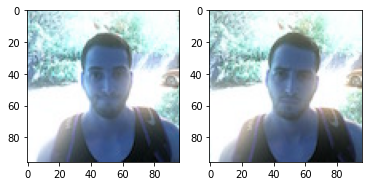

In [41]:
plt.subplot(1,2,1)
im1 = cv2.imread('dan.jpg')
plt.imshow(im1)
plt.subplot(1,2,2)
im2 = cv2.imread('camera_4.jpg')
plt.imshow(im2)